In [1]:
from scipy.stats import kurtosis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
my_random_state = 318
import time
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, normalize
from sklearn.metrics import accuracy_score,plot_confusion_matrix, confusion_matrix

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.random_projection import GaussianRandomProjection as RP

clusterings = ['KMeans','EM']
dimReductions = ['PCA','ICA', 'RP', 'IG']

# data import and preprocessing


In [2]:
##### Adult Income
### http://archive.ics.uci.edu/ml/datasets/Adult
data = pd.read_csv('datafiles/adult.csv')
data

y_data_raw = data.income

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_data_raw.values.tolist())
y_data = le.transform(y_data_raw)


x_data_raw = data.loc[:,'age':'native-country']

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(x_data_raw.values.tolist())
x_data = enc.transform(x_data_raw)


# x_data = normalize(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7, random_state=my_random_state, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(22792, 14) (9769, 14) (22792,) (9769,)


In [3]:
x_data

array([[2.2000e+01, 7.0000e+00, 2.6710e+03, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       [3.3000e+01, 6.0000e+00, 2.9260e+03, ..., 0.0000e+00, 1.2000e+01,
        3.9000e+01],
       [2.1000e+01, 4.0000e+00, 1.4086e+04, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       ...,
       [4.1000e+01, 4.0000e+00, 7.8830e+03, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       [5.0000e+00, 4.0000e+00, 1.2881e+04, ..., 0.0000e+00, 1.9000e+01,
        3.9000e+01],
       [3.5000e+01, 5.0000e+00, 1.7825e+04, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01]])

In [4]:
y_data_raw

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

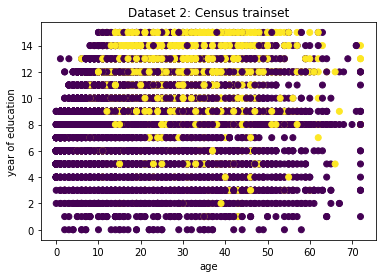

In [5]:
plt.scatter(x_train[:,0],x_train[:,4], c=y_train, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset')
plt.xlabel('age')
plt.ylabel('year of education')
# plt.ylabel('fnlwgt')
plt.savefig(f'part2/census.png')
plt.show()

In [6]:
y_test.tolist().count(0)

7377

In [7]:
y_test.tolist().count(1)

2392

# modify thisDR!!!

# modify DR function handle:

from sklearn.decomposition import PCA, FastICA, NMF

from sklearn.random_projection import GaussianRandomProjection as RP

In [8]:
thisDR = 'NMF' 
# 'initial' if no DR. Skip section 1 

# x_train_transform = x_train # default for 'initial'
# x_test_transform = x_test # default for 'initial'

# 1. Dimensionality Reduction

In [9]:
################################
DR = NMF(n_components = 10,
         random_state = my_random_state)

tic = time.perf_counter() 
DR.fit(x_train)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"Dimensionality Reduction Algorithm training time {toc - tic} seconds")
print()

Dimensionality Reduction Algorithm training time 0.9192714000000137 seconds



training time 0.08422219999999925 seconds
[9.07665664]

training time 0.11099500000000262 seconds
[9.07685729 0.24959423]

training time 0.22244739999996455 seconds
[9.07688539 0.46381649 8.3880093 ]

training time 0.2648920999999973 seconds
[9.07689709 2.28973283 8.72344596 8.411419  ]

training time 0.3709883000000218 seconds
[9.07689841 2.25333009 8.96473346 8.3636352  8.54056987]

training time 0.5038756000000149 seconds
[9.07692007 8.81323829 9.0359377  8.93137723 8.96941416 7.90841635]

training time 0.5513075000000072 seconds
[9.07692023 9.00515594 9.0371418  8.98182858 8.99510845 8.51215925
 1.86642744]

training time 0.6174045999999862 seconds
[9.07692023 9.02042086 9.03008089 9.06077609 8.99515711 8.94521105
 8.46115338 5.59773466]

training time 0.7535459999999716 seconds
[9.07692275 3.4217497  9.03003805 9.0750459  8.96852239 8.45627616
 8.81328326 5.06736396 8.12215747]

training time 0.8685791999999992 seconds
[9.0769223  4.33690414 9.04080992 9.07367289 9.02081145 4.0648

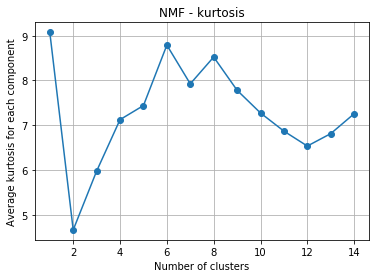

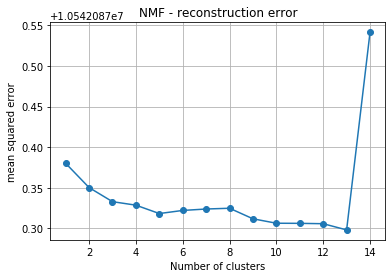

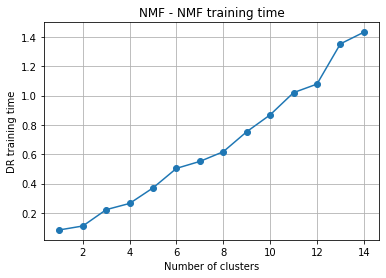

In [12]:
# Kurtosis & Reconstruction Error
numfeatures = x_train.shape[1]
# numfeatures = 16
kurtosis_all = []
mse_all = []
DRtraintimes = []
for i in range(1, 1+numfeatures):
    DR = NMF(n_components = i, random_state = my_random_state)
    
    tic = time.perf_counter() 
    DR.fit(x_train)
    toc = time.perf_counter() 
    print(f"training time {toc - tic} seconds")
    DRtraintimes.append(toc-tic)
    
    kurt = kurtosis(DR.components_.T)
#     print(DR.components_)
    print(kurt)
    kurtosis_all.append(np.mean(kurt))
    
    x_train_transform = DR.fit_transform(x_train)
    x_train_inverse = np.linalg.pinv(DR.components_.T)
    x_train_reconstruct = x_train_transform.dot(x_train_inverse)
    mse = np.sum(np.square(x_train - x_train_reconstruct))/x_train_reconstruct.size
    mse_all.append(mse)
#     x_test_transform = DR.fit_transform(x_test)
#     x_train_inverse = DR.inverse_transform(x_train_transform)
    print()

plt.figure()
plt.plot(range(1,1+numfeatures), kurtosis_all, marker = 'o')
plt.title(f'{thisDR} - kurtosis')
plt.xlabel('Number of clusters')
plt.ylabel('Average kurtosis for each component')
plt.grid()
plt.savefig(f'part2/{thisDR}_kurtosis.png')
plt.show()


plt.figure()
plt.plot(range(1,1+numfeatures), mse_all, marker = 'o')
plt.title(f'{thisDR} - reconstruction error')
plt.xlabel('Number of clusters')
plt.ylabel('mean squared error')
plt.grid()
plt.savefig(f'part2/{thisDR}_mse.png')
plt.show()


plt.figure()
plt.plot(range(1,1+numfeatures), DRtraintimes, marker = 'o')
plt.title(f'{thisDR} - NMF training time')
plt.xlabel('Number of clusters')
plt.ylabel('DR training time')
plt.grid()
plt.savefig(f'part2/{thisDR}_DRtraintimes.png')
plt.show()

In [17]:
###############################

best_n_components = 10

bestDR = NMF(n_components=best_n_components, random_state = my_random_state)
x_train_transform = bestDR.fit_transform(x_train)
x_test_transform = bestDR.fit_transform(x_test)

x_train_inverse = bestDR.inverse_transform(x_train_transform)

# Reconstruction Error
mse = np.sum(np.square(x_train - x_train_inverse))/x_train_inverse.size
print('MSE: ', mse)
#  MSE:  398438.687445093 for n=10

MSE:  398438.687445093


In [19]:
x_train_transform.shape

(22792, 10)

In [20]:
x_train_reconstruct.shape

(22792, 14)

# 2. after dimensional reduction: KMeans

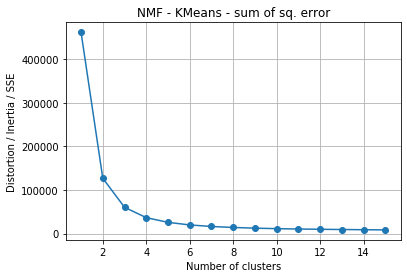

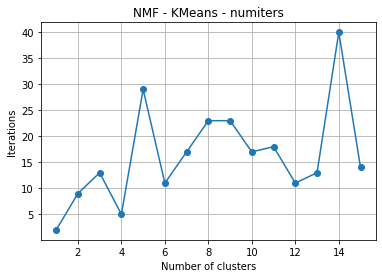

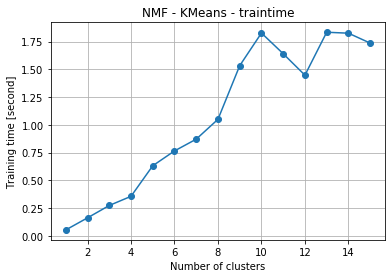

In [21]:
thisClust = 'KMeans'
# calculate distortion for a range of number of cluster
distortions = []
numiters = []
traintime = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, 
                random_state=my_random_state)
    
    tic = time.perf_counter() 
    km.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    
    distortions.append(km.inertia_)
    numiters.append(km.n_iter_)

# plot
plt.figure()
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion / Inertia / SSE')
plt.title(f'{thisDR} - {thisClust} - sum of sq. error')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_distortion.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 16), numiters, marker='o')
plt.title(f'{thisDR} - {thisClust} - numiters')
plt.xlabel('Number of clusters')
plt.ylabel('Iterations')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 16), traintime, marker='o')
plt.title(f'{thisDR} - {thisClust} - traintime')
plt.xlabel('Number of clusters')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_traintime.png')
plt.show()

## KMeans n=2
### compare with original labeling

In [22]:
km2 = KMeans(n_clusters = 2, random_state = my_random_state)


tic = time.perf_counter() 
km2.fit(x_train_transform)
toc = time.perf_counter() 
print(f"training time {toc - tic} seconds")
print()

print(km2.cluster_centers_)
print(km2.labels_)
print(km2.inertia_)
print(km2.n_iter_)

training time 0.17491830000017217 seconds

[[ 4.05905886  0.25334649  0.10439973  0.250817    0.04483351  0.07910455
   0.09319744  0.11203732  0.20924929  0.19767347]
 [11.73588295  0.24010785  0.09801965  0.22468738  0.03666806  0.07929396
   0.09326917  0.11144769  0.19172338  0.19990931]]
[1 0 0 ... 0 0 0]
126961.04281886255
9


In [23]:
km2.labels_.tolist().count(1)

11035

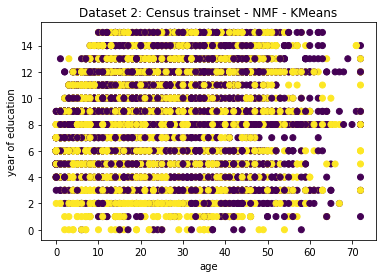

In [24]:

plt.scatter(x_train[:,0],x_train[:,4], c=km2.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

[[8858 8485]
 [2899 2550]]
Prediction accuracy on train set: 0.5005265005265005


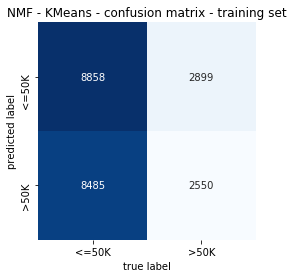

In [25]:
species = ['<=50K','>50K']

y_train_km2 = []
for l in km2.labels_:
    y_train_km2.append(species[l])
    
train_confmat_km2 = confusion_matrix(y_train, km2.labels_)
train_accu_km2 = accuracy_score(y_train, km2.labels_)
print(train_confmat_km2)
print(f"Prediction accuracy on train set: {train_accu_km2}")


import seaborn as sns
# species.reverse() # for plotting
sns.heatmap(train_confmat_km2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - training set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_train.png')

In [26]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km2.inertia_)
score = silhouette_score(x_train_transform, km2.labels_)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(y_train, km2.labels_)
# ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_km2)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  126961.04281886255
Silhouette score:  0.5955923031622402
Adjusted Mutual Information (AMI) score:  0.00023006265604358427


In [27]:
tic = time.perf_counter() 
y_test_predict2 = km2.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()
y_test_predict2

testing time 0.0014934999999240972 seconds



array([0, 0, 0, ..., 1, 0, 0])

In [28]:
y_test_predict2.tolist().count(0)

4031

[[3583 3794]
 [1130 1262]]
Prediction accuracy on test set: 0.4959565973999386


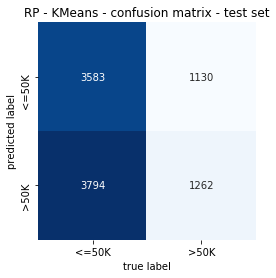

In [31]:

species = ['<=50K','>50K']
y_test_km2 = []
for pred in y_test_predict2:
    y_test_km2.append(species[pred])
    
# print(f"Prediction accuracy on test set: {accuracy_score(le.inverse_transform(y_test),y_test_km)}")
# # best_test_accuracy[0] = accuracy_score(y_test,y_test_dt)


test_confmat_km2 = confusion_matrix(y_test, y_test_predict2)
test_accu_km2 = accuracy_score(y_test, y_test_predict2)
print(test_confmat_km2)
print(f"Prediction accuracy on test set: {test_accu_km2}")


# species.reverse() # for plotting
sns.heatmap(test_confmat_km2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - test set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_test.png')



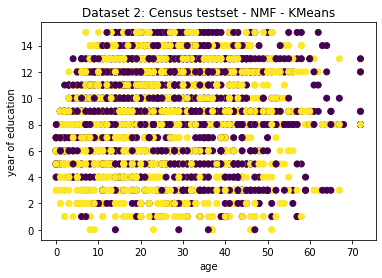

In [29]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()

In [31]:
# Evaluate quality of clusters
print('test set')
import random as rand
y_test_predict2[rand.randint(0,9000)] = 1 # arbitrary, because no 1 was predicted
score = silhouette_score(x_test_transform, y_test_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(y_test, y_test_predict2)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.5754762182359077
Adjusted Mutual Information (AMI) score:  0.00025400065915409886


## KMeans n=? 
### change best_n_clusters!  determined from graph

In [32]:
best_n_clusters = 4
km = KMeans(n_clusters = best_n_clusters, random_state = my_random_state)


tic = time.perf_counter() 
km.fit(x_train_transform)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print(km.cluster_centers_)
print(km.labels_)
print(km.inertia_)
print(km.n_iter_)

training time 0.3515262000000803 seconds

[[ 1.99716454  0.25848085  0.09863294  0.2495415   0.04126247  0.07919424
   0.09430388  0.11246035  0.21315275  0.19704874]
 [13.86339813  0.23926068  0.10065024  0.21793638  0.03647009  0.07921974
   0.09282297  0.11154433  0.18587209  0.20013557]
 [ 5.87697957  0.24842905  0.10917082  0.25201481  0.04844751  0.07889788
   0.09226506  0.11167769  0.2062854   0.19868438]
 [ 9.75857769  0.24134306  0.09634447  0.23121809  0.03666821  0.07948416
   0.09357951  0.11134387  0.19666322  0.19921186]]
[3 2 3 ... 0 2 2]
36450.41124897644
5


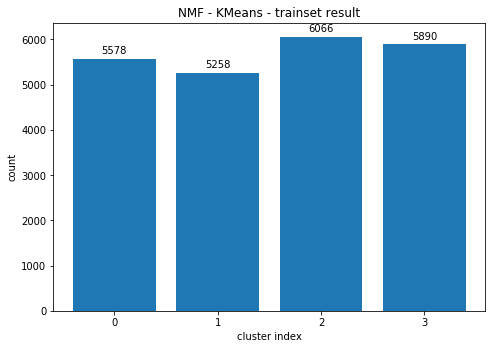

In [33]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in km.labels_:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts)
plt.title(f'{thisDR} - {thisClust} - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_train.png')

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [34]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km.inertia_)
score = silhouette_score(x_train_transform, km.labels_)
print('Silhouette score: ', score)
# ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), x_train_km)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), km.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  36450.41124897644
Silhouette score:  0.5159034438960232
Adjusted Mutual Information (AMI) score:  0.0004476516734686143


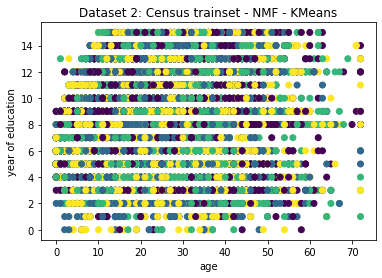

In [35]:

plt.scatter(x_train[:,0],x_train[:,4], c=km.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [36]:


tic = time.perf_counter() 
y_test_predict = km.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.002229700000043522 seconds



array([0, 0, 0, ..., 1, 0, 0])

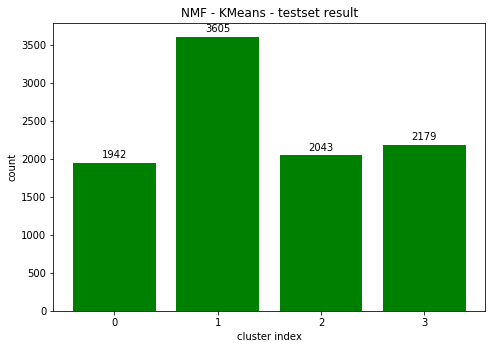

In [37]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title(f'{thisDR} - {thisClust} - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [38]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.47383284052336383
Adjusted Mutual Information (AMI) score:  0.0002387662665672374


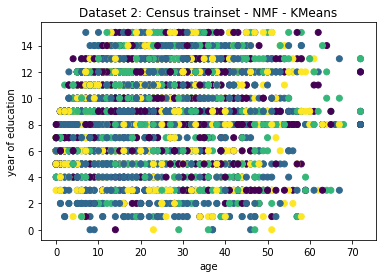

In [39]:

plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test.png')
plt.show()

# 3. after dimensional reduction: Expectation Maximization (EM)

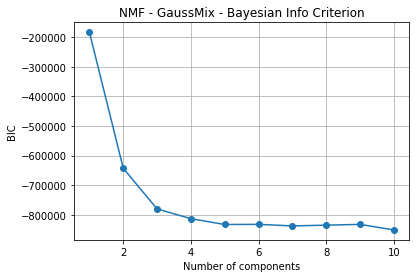

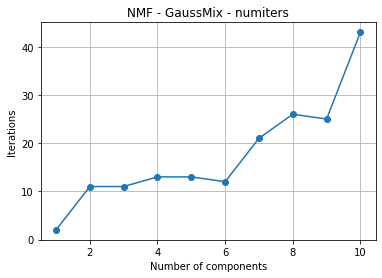

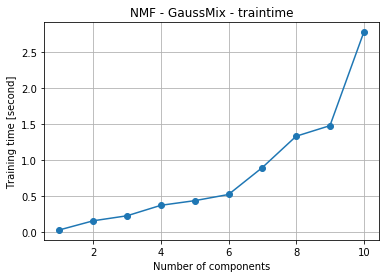

In [40]:
thisClust = 'GaussMix'
#  Find the optimal number of components using BIC
n_components_grid = np.arange(1, 11)
# bic = np.zeros(n_components_grid.size)
bic = []
numiters = []
traintime = []

# for idx, n_components in enumerate(n_components_grid):
for n_components in n_components_grid:
    gm = GaussianMixture(n_components=n_components, random_state=my_random_state)
    
    tic = time.perf_counter() 
    gm.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    
    numiters.append(gm.n_iter_)
    bic.append(gm.bic(x_train_transform))
#     bic[idx] = gm.bic(x_train)
print()


# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid, bic, marker='o')
# plt.xticks(k_grid)
plt.title(f'{thisDR} - {thisClust} - Bayesian Info Criterion')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_bic.png')

# plot
plt.figure()
plt.plot(n_components_grid, numiters, marker='o')
plt.title(f'{thisDR} - {thisClust} - numiters')
plt.xlabel('Number of components')
plt.ylabel('Iterations')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(n_components_grid, traintime, marker='o')
plt.title(f'{thisDR} - {thisClust} - traintime')
plt.xlabel('Number of components')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_traintime.png')
plt.show()

## Gaussian Mixture best_n_component = 2
### compare with original labeling

In [41]:
# the best n_clusters determined to be 4 (same as the original labeling)

best_n_component = 2
gm2 = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm2.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict2 = gm2.predict(x_train_transform)
y_train_predict2

training time 0.18904569999995147 seconds



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [42]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

In [43]:
y_train_predict2.tolist().count(1)

19855

[[16091  1252]
 [ 3764  1685]]
Prediction accuracy on train set: 0.7799227799227799


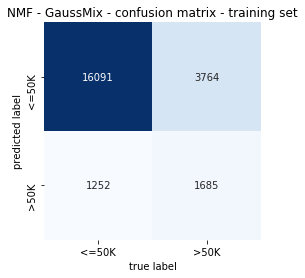

In [44]:
species = ['<=50K','>50K']

# y_train_gm2 = []
# for l in y_train_predict2:
#     y_train_gm2.append(species[l])

y_train_predict2 = -1*(y_train_predict2 - 1) # inverse 0 & 1 if necessary

train_confmat_gm2 = confusion_matrix(y_train, y_train_predict2)
train_accu_gm2 = accuracy_score(y_train, y_train_predict2)
print(train_confmat_gm2)
print(f"Prediction accuracy on train set: {train_accu_gm2}")


# species.reverse() # for plotting
sns.heatmap(train_confmat_gm2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - training set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_train.png')

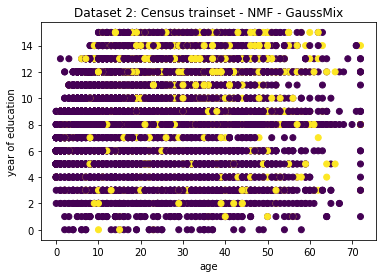

In [45]:

plt.scatter(x_train[:,0],x_train[:,4], c=y_train_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

In [46]:
# Evaluate quality of clusters
print('training set')
# print('Inertia: ', km2.inertia_)
score = silhouette_score(x_train_transform, y_train_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict2)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Silhouette score:  0.03418010344112474
Adjusted Mutual Information (AMI) score:  0.08359333352857207


In [47]:

tic = time.perf_counter() 
y_test_predict2 = gm2.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict2

testing time 0.0022502000001622946 seconds



array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [48]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

[[6768  609]
 [1624  768]]
Prediction accuracy on test set: 0.7714197973180469


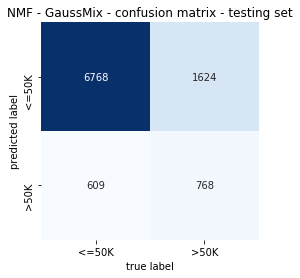

In [49]:
species = ['<=50K','>50K']

y_test_predict2 = -1*(y_test_predict2 - 1) # inverse 0 & 1 if necessary

test_confmat_gm2 = confusion_matrix(y_test, y_test_predict2)
test_accu_gm2 = accuracy_score(y_test, y_test_predict2)
print(test_confmat_gm2)
print(f"Prediction accuracy on test set: {test_accu_gm2}")


# species.reverse() # for plotting
sns.heatmap(test_confmat_gm2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - testing set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_test.png')

In [50]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict2)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.02495493460671936
Adjusted Mutual Information (AMI) score:  0.07841790197988474


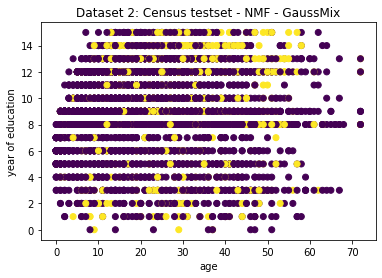

In [51]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()



## Gaussian Mixture best_n_component = ?
### change best_n_component!  determined from graph

In [52]:
best_n_component = 6
gm = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict = gm.predict(x_train_transform)
y_train_predict

training time 0.5626981999998861 seconds



array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [53]:
# Evaluate quality of clusters
print('training set')
score = silhouette_score(x_train_transform, y_train_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)
# print(f"Prediction accuracy on train set: {accuracy_score(le.inverse_transform(y_train),y_train_predict)}")

training set
Silhouette score:  -0.2834535391907947
Adjusted Mutual Information (AMI) score:  0.05993881331798493


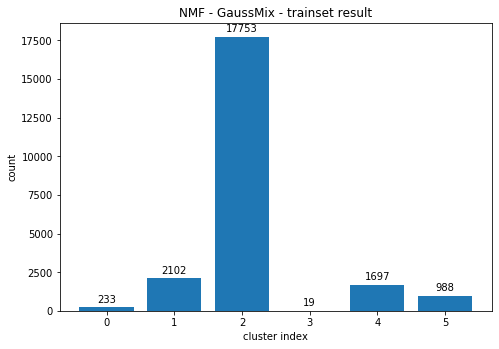

In [54]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for yp in y_train_predict:
    counts[yp] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices,counts)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.title(f'{thisDR} - {thisClust} - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_train.png')
plt.show()

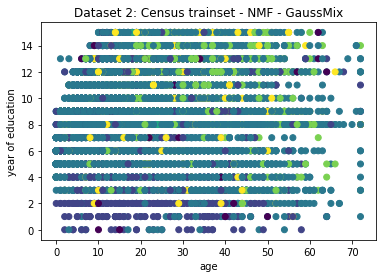

In [55]:
plt.scatter(x_train[:,0],x_train[:,4], c=y_train_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [56]:


tic = time.perf_counter() 
y_test_predict = gm.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.004956100000072183 seconds



array([2, 0, 0, ..., 1, 1, 1], dtype=int64)

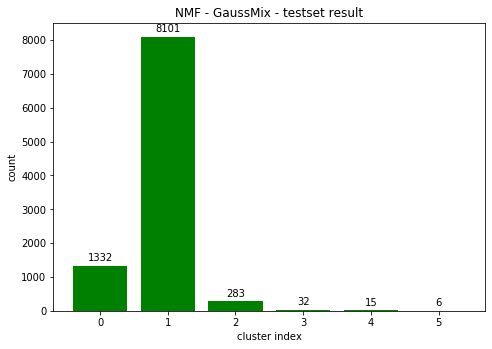

In [57]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title(f'{thisDR} - {thisClust} - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [58]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  -0.3744782566137543
Adjusted Mutual Information (AMI) score:  0.06851086506253957


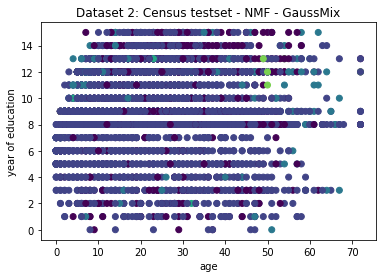

In [59]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test.png')
plt.show()